In [1]:
# importamos todas las librerias necesarias
import torch
import torch.nn as nn # para redes neuronales
import torch.optim as optim # optimizaciones


from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
import numpy as np
import cv2


# FashionMNIST
---

---





In [2]:
# espacio en la memoria y el dataset de FashioMNIST
data_path = 'data/'
full_data_set = datasets.FashionMNIST(data_path, train = True, download = True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.2860), (0.3530))]))

full_validation_set = datasets.FashionMNIST(data_path, train = False, download = True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.2860), (0.3530))]))


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Se utilizará un size = 3 para que en batch_size se carguen de 4 en 4 imagenes.
# Shuflle = true, permite que por cada iteración las imagenes sean diferentes
# num_workers es el número de subprocesos que se utilizarán para la carga de la información
# Se carga la información con los datos de full_data_set
size = 3
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sneaker
Ankle boot
Trouser


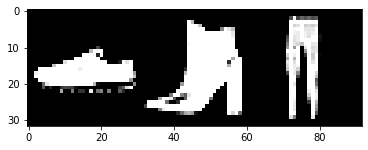

In [6]:
data_iterator = iter(dataloader) # crea un iterator que contendra los paquetes en 4 imagenes de la data
imgs, labels = data_iterator.next() # obtiene el paquete de 4 imagenes, y de ellas su imagen y su etiqueta en número

#etiquetas en orden que serán usadas
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0)) # muestra la imagen en formato grid
for i in range(size):
  print(classes[labels[i]]) #imprime el nombre de las etiquetas en el batch actual

In [7]:
class_names = ["Trouser","Dress"]
label_map = {1:0, 3:1}
data_set = [(img, label_map[label])for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1,3]]
img, label = data_set[200]
img.shape

torch.Size([1, 28, 28])

In [8]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'Trouser'

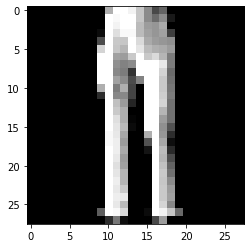

In [23]:
model = nn.Sequential(
    nn.Linear(1 * 28 * 28, 392),
    nn.Tanh(), #la función de activación de esas salidas es tahn
    nn.Linear(392, 2),
    nn.LogSoftmax(dim=1)
    )
img, label = data_set[1400]
plt.imshow(utils.make_grid(img).permute(1, 2, 0))
class_names[label]

In [24]:
out = model(img.view(-1).unsqueeze(0))
out
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> Trouser model: Trouser


# Implementando un clasificador totalmente conectado

---

---





In [26]:
model = nn.Sequential(
    nn.Linear(1 * 28 * 28, 392),
    nn.Tanh(), #la función de activación de esas salidas es tahn
    nn.Linear(392, 2),
    nn.LogSoftmax(dim=1)
    )
#aplicando el principio de logaritmos para corrección de errores cambiamos a nn.LogSoftmax
loss_function = nn.NLLLoss()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'Trouser'

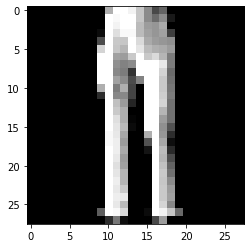

In [27]:
# volvemos a mandar la imagen
img, label = data_set[1400]
plt.imshow(utils.make_grid(img).permute(1, 2, 0))
#Me imprime un trouser, que es el que esta en la posición 100
class_names[label]

In [28]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label],'model:',class_names[index])

tensor([[-0.6682, -0.7187]], grad_fn=<LogSoftmaxBackward>)
-> Trouser model: Trouser


In [ ]:
model = nn.Sequential(
    nn.Linear(1 * 28* 28, 392),
    nn.Tanh(),
    nn.Linear(392, 2),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5 # definimos el número de iteraciones
for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.000103
Epoch: 1, Loss: 0.000056
Epoch: 2, Loss: 0.000049
Epoch: 3, Loss: 0.000045
Epoch: 4, Loss: 0.000028


In [ ]:
#Creamos un batch para el entrenamiento
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(  
    nn.Linear(784,392),
    nn.Tanh(),
    nn.Linear(392,2),
    nn.LogSoftmax(dim=1)
    )

optimizer = optim.SGD(model.parameters(), lr=0.01)

loss_function = nn.NLLLoss()
n_epochs = 200

for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 199, Loss: 0.000076


In [ ]:
# vamos a probar con nuestro validation loader y comprobamos contra el modelo
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 0.993500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  Trouser  model: Dress


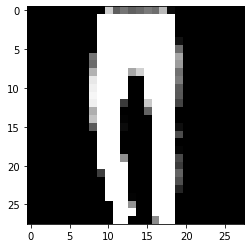

In [35]:
# comprobamos con imagenes al azar para ver que tan bien nos va
img, label = validation_set[1200]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:', class_names[index])
plt.imshow(utils.make_grid(img).permute(1, 2, 0))
plt.show()

# Mejoras y limitaciones

---

---





In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=32, shuffle=True)

# cambiar el modelo para tener una más profunda red neuronal
model = nn.Sequential(
    nn.Linear(784,392),
    nn.Tanh(),
    nn.Linear(392,196),
    nn.Tanh(),  
    nn.Linear(196,98),
    nn.Tanh(),  
    nn.Linear(98,49),
    nn.Tanh(),  
    nn.Linear(49,2),
    )
# combina a LogSoftmax y NNloss para calcular la efectividad del modelo
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 99, Loss: 0.000129
